In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import math
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Linear regression

## Introduction

### What is Machine Learning?

To answer the question what is Machine learning we need to ask ourselves what is learning in general. The definition from
google dictionary is `the acquisition of knowledge or skills through study, experience, or being taught.`. So in the same way
humans learn. Machines can also learn and improve their abilities to perform certain task based on some given data.

### Supervised vs Unsupervised learning

#### Supervised learning
Again I want to make analogy to the reall world. Let's take example of how a small baby learns you can show the baby a banana and tell him this is banana
and show him an apple and tell the baby this is an apple. Seeing this two things the baby observes the banana and the apple and remembers some features about them so when it sees a banana again it will know this is a banana. That type of learning is called supervised learning.

The idea of supervised learning is that you provide the machine with a training data that consist of some example input and the correct output for this input. Then the machine will use the training data to build a model, which can predict the outcome of a new data based on past examples.

#### Unsupervised learning

But imagine another example the baby is shown some cats and dogs, the baby have not seen cats and dogs before so it does not know their features, but looking at them it can see the similarities between the different types of cat and dogs and it can see the differences between a cat and a dog the baby realizes this are two different group of animals.
That is unsupervised learning, labeling the cat and dogs is not possible for the baby, but it can still find the difference.

The idea of the unsupervised learning is to detect patterns in the data. Unsupervised learning allows us to approach problems with little or no idea what our results should look like. We can derive structure from data where we don't necessarily know the effect of the variables. We can derive this structure by clustering the data based on relationships among the variables in the data.

### Classification vs Regression
Two different types of supervised learning exist **Classification** and **Regresion**. The difference between two is that Regression outputs a continues variable for given input, and classification outputs a categorial output for given input.

Example of an classification problem will be giving the machine some picture and the machine tells if you have a cat or dog on the picture. Or giving the machine some information about insurance claims and the machine tells you if this claim should be conpensated or not. Example of a regression problem will be giving the machine some information about a car and the machine should tell how much money could this car cost.  

Some algorithms used for classification problems:
* Logistic Regression
* Naive Bayes Classifier
* k-nearest-neighbors
* Support Vector Machines
* Decision Trees

Some algorithms used for regression problems:
* Linear Regression model
* Polynomial regression
* Lasso Regression
* Stepwise Regression

## What is Linear regression?

In this notebook I will provide a description to what is linear regresion, where it is applied, how it is implemented and how it is evaluated.

Linear regression is used for finding linear relationship between target and predictors.
Let's look at an example data points, showing temperature in Celsius in one column and coressponding temperature in Farenheit in the second column:

### Data that is described by a line

Let's look at some data which shows, temperature in Celsius in one column and it coresponding temperature in Fahrenheit in the other column.

In [3]:
celsius_to_fahrenheit = pd.read_csv("data/celsius-to-fahrenheit.csv")
celsius_to_fahrenheit

,Celsius,Fahrenheit
0,21,69.8
1,8,46.4
2,13,55.4
3,19,66.2
4,10,50.0
5,18,64.4


Let's plot it

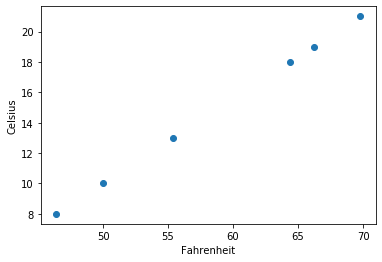

In [4]:
plt.scatter(celsius_to_fahrenheit["Fahrenheit"], celsius_to_fahrenheit["Celsius"])
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.show()

Looking at the plot and the points it is obvious that they are lying on the same line. That is because actually this plot represent two lineary dependent variables. The formula for conversion from celsius to farenheit is:

$$ T_{(°C)} = (T_{(°F)} - 32) \times 5/9 $$

Let's draw the line.

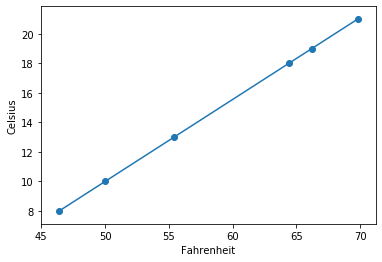

In [5]:
x = np.linspace(celsius_to_fahrenheit["Fahrenheit"].min(), celsius_to_fahrenheit["Fahrenheit"].max())
y = (x - 32) * (5 / 9)
plt.plot(x, y)
plt.scatter(celsius_to_fahrenheit["Fahrenheit"], celsius_to_fahrenheit["Celsius"])
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.show()

The line we have drawn can help us find the celsius temperature given only the fahrenheit temperature.
But lets look at a little bit more interesting example.

### Data that is almost described by a line

Here we have some data about a city its population and a revenue for a given company from this city.

In [6]:
population_profit = pd.read_csv("data/population-profit.csv", header = None, names = ["Population", "Profit"])
population_profit

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


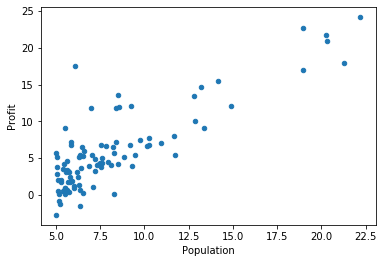

In [7]:
population_profit.plot(kind = "scatter", x = 0, y = 1)
plt.show()

Clearly there is no line that passes through all the points exactly, but there is a trend. So maybe we can find a line that could describe this trend. And there is a logic that the population of the city will influance the profit we make.  
We can still try to run a line through this points that will try to predict the profit based on the city population. What we would like for this line is to minimize the error on the training data it is provided with.  
We will define `eror = actual_output - predicted_output`. And what we would like is to minimize it for all the data in our training set. So we will try to minimize this global error.

$$ Error = \sum_{i=1}^n(actual\_output - predicted\_output)^2 $$

We are minimizing the squared error because if we don't then positive and negative error will cancel out. Actually one of the assumptions we have when we are running linear regression is **that the error will have normal distribution, with a mean 0.**. The other assumption that is obvious is that **the output will have some dependence to the input that can be expressed as a linear function**.

### Normal equation method

Lets look at a slightly more comlicated example. Here we have a dataset that describe houses with their size in square feet, how many bedrooms they have and what is the price. So our linear regresion will try to fit the a line in the 3d space that will best fit the input `(size, bedrooms)` to the output `price`

In [8]:
house_prices = pd.read_csv("data/house-prices.csv", header=None, names=["Size", "Bedrooms", "Price"])
house_prices

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Lets give a little bit more mathematical definition to our problem

We will want to build a function $ h(x) = \theta_0x_0 + \ldots + \theta_mx_m $ That for given  $ x = \begin{pmatrix} x_0 & x_1 & \ldots & x_m \end{pmatrix} $ will return  best prediction $ y $. Where $ x_0 $ is always equal to one.

So we can imagine our training data input as an matrix $$ X = \begin{pmatrix} x_0^0 & x_1^1 & \ldots & x_m^1 \\
\vdots  & \vdots &  & \vdots  \\
x_0^n & x_1^n & \ldots & x_m^n
\end{pmatrix} $$
And the result as a vector $$ y = \begin{bmatrix}y^1 \\ y^2 \\ \vdots \\ y^n \end{bmatrix} $$

So will find $ \theta $ using the following equation.
$$ \theta = (X^TX)^{-1}X^Ty $$ 

This equation is called normal equation. And it finds the line that minimizes the sum of the square distances from the points Which is exactly what we want. The method of deriving this equation is out of the scope of this notebook, but if you are familiar with linear algebra concepts you can look how it is derived from this [Khan Academy video](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-least-squares-approximation).

So now that we have the mathematical algorithm we can try implementing it in python. 

First we need to add $ x_0 $ as first column equal always to 1. That is how the term $ \theta_0x_0 $ will represent the constant term in the line equation.

In [9]:
# add x_0 = 1
population_profit.insert(0, "$ x_0 $", 1)
house_prices.insert(0, "$ x_0 $", 1)

Secondly we will implement two methods for converting dataframe to $ X $ matrix and $ y $ vector

In [10]:
def getX(dataFrame):
    (n, m) = dataFrame.shape
    return dataFrame.iloc[:, 0:m - 1].values

This is how the matrix of input variables $ X $ looks like for our population to profit data.

In [11]:
getX(population_profit)

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [12]:
def getY(dataFrame):
    (n, m) = dataFrame.shape
    return dataFrame.iloc[:, m - 1].values

And this is how the output vector $ y $ looks for the same population data.

In [13]:
getY(population_profit)

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

Now lets implement the function to calculate the normal equation for us.

In [14]:
def normal_equation(X, Y):
    inverse_matrix = np.linalg.inv(np.dot(X.T, X))
    multiply = np.dot(inverse_matrix, X.T)
    theta = np.dot(multiply, Y)
    return theta

### Normal equation method testing

Lets see the coeficients for the line that will best describe our data. And draw it. For this I will define a helper function that will accept given $ x $ and given $ \theta $ and will return $ y $.

In [15]:
def hypothesis(x, theta):
    return np.dot(x, theta)

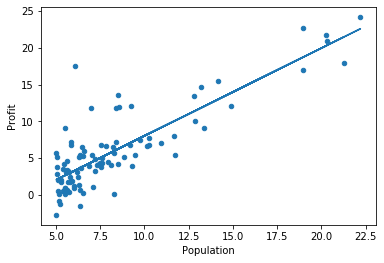

In [16]:
population_profit_X = getX(population_profit)
population_profit_Y = getY(population_profit)
theta = normal_equation(population_profit_X, population_profit_Y)

population_profit.plot(kind="scatter", x=1, y=2)
plt.plot(population_profit_X[:, 1], hypothesis(population_profit_X, theta))
plt.show()

The normal equation method of linear regression calculation is implemented in `sklearn` library. In the `LinearRegression` class so we can test our implementation and see if it gets the same result as the `sklearn` implementation. 

In [17]:
reg = LinearRegression(fit_intercept=False)
expected = reg.fit(population_profit_X, population_profit_Y).coef_
actual = normal_equation(population_profit_X, population_profit_Y)
assert all([math.isclose(a, e) for (a, e) in zip(actual, expected)])

Turns out it works, let's test it with the house_prices data also.

In [18]:
house_prices_X = getX(house_prices)
house_prices_Y = getY(house_prices)

In [19]:
reg = LinearRegression(fit_intercept=False)
expected = reg.fit(house_prices_X, house_prices_Y).coef_
actual = normal_equation(house_prices_X, house_prices_Y)
assert all([math.isclose(a, e) for a, e in zip(actual, expected)])

Turns out our implementation gives identical results to the `sklearn` implemantation for our datasets. The line also looks like the best line for the `population_profit` data. So we can be pretty confident that this implemantation works as expected

### Singular matrix

There is one fundamental problem with our current implementation. What if the $ (X^TX) $ matrix is singular (non-invertable). Then our implemantation will not work. One matrix is singular if and only if it discriminant is equal to zero. That can happen if there are linearly dependent rows in the matrix. The common causes of this are:
* **Redundant features, where two features are very closely related (i.e. they are linearly dependent)**
* **Too many features**  

In case of features that are **linearly dependend** to other features for example temperature in celsius and temperature in fahrenheit, **one of this features should be simpy removed**.  
In case of **too many features**, some features could be omited, more data could be collected or some special technique called regularization could be applied. Let's try breaking our function

In [20]:
singular_matrix = pd.read_csv("data/singular-matrix.csv")
singular_matrix.insert(0, "$ x_0 $", 1)
singular_matrix

,$ x_0 $,Size (feet$^2$),Number of bedrooms,Number of floors,Age of home (years),Price ($1000)
0,1,2104,5,1,45,460
1,1,1416,3,2,40,232


In [21]:
singular_matrix_X = getX(singular_matrix)
singular_matrix_Y = getY(singular_matrix)

In [22]:
normal_equation(singular_matrix_X, singular_matrix_Y)

LinAlgError: Singular matrix

As expected we get an error. But let's try using the `sklearn` method.

In [23]:
LinearRegression(fit_intercept=False).fit(singular_matrix_X, singular_matrix_Y).coef_

array([-0.26330913,  0.38581458,  0.29504803, -1.06910598, -7.81992674])

It works it turns out what we need is something very small instead of using inverse of an matrix we need to use [pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). So our function should be changed only a little bit and it will work. The pseudo-inverse algorithm for inversing a matrix is implemented in `numpy`, just like the standard inverse algorithm. So our function will look like this:

In [24]:
def normal_equation(X, Y):
    inverse_matrix = np.linalg.pinv(np.dot(X.T, X))
    multiply = np.dot(inverse_matrix, X.T)
    theta = np.dot(multiply, Y)
    return theta

In [25]:
normal_equation(singular_matrix_X, singular_matrix_Y)

array([-0.26330913,  0.38581458,  0.29504803, -1.06910598, -7.81992674])

Although the algorithm works with singular matrixes. Having a singular matrix is certainly some kind of a warning and one of the aproaches described above should be considered.

### Gradient and descent algorithm

One huge disadvantage for the normal equations method is the need to calculate the inverse of $ X^TX $ that is a problem because there is no existing efficient algorithm for finding the inverse of a matrix and this takes $ O(n^3) $ time. Which means that the time required to compute grows with a qubic speed compared to the input size.  
So in case we have many features more than 1000 or even more than 10000 we will start seeing how this method becomes slow.
Ofcourse more efficient algorithm for finding linear regression in this case exists.

#### Cost function

What we are trying to do with linear regression is to find a line that minimizes the total sum of the errors in the training data. So maybe we can define a function. 

$$ J(\theta) = \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2 $$

So the minimum of the function $ J $ will give us the theta that best fits the points. This function is commonly called the loss function of linear regression. And a function that takes the avarage error  
$$ J(\theta) = \frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2 $$
Is called the cost function. But because we will search for the minimum of the function the cost functions is oftenly taken as half of the cost function because if you are finding the minimum it does not change anything, but it makes math easier, because of derivative calculation. So we will define our final cost function as:
$$ J(\theta) = \frac{1}{2n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2 $$

Lets implement this cost function in python.

In [26]:
def compute_cost(X, Y, theta):
    inner = np.power((np.dot(X, theta) - Y), 2)
    n, m = X.shape
    return np.sum(inner) / (2 * n)

In [27]:
compute_cost(population_profit_X, population_profit_Y, normal_equation(population_profit_X, population_profit_Y))

4.476971375975179

#### Cost function minimum

To find the minimum we will use an algorithm called gradient descent. What this algorithm basically does is finds the direction where the function decreases the most and takes a step in this direction. That is how at some time it reaches the minimum and stops.

So the algorithm basically does this.  
Repeat until convergence
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$
Where $ j = 1 \ldots m $

In order to implement this we will need to find the partial derivative of the cost function $ J(\theta) $ with respect to $ \theta_j \hspace{2mm} j= 1\ldots m $. How this is done is again out of the scope of this notebook so I will just insert the formula. But on this [link](https://mccormickml.com/2014/03/04/gradient-descent-derivation/) you can find how to do it and in general more detailed information about gradient descent algorithm

$$ \frac{\partial}{\partial \theta_j} \frac{1}{2n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2 = \frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j  $$

#### Gradient descent implementation

In order to implement the gradient descent we will brake it to three methods, one for calculating the derivative, one for doing the descent step and one for repeating the descent step until convergence.

In [28]:
def derivative_calc(X, theta, error, j):
    term = error * X[:,j]
    derivative = np.sum(term) / X.shape[0]
    return derivative
    

def gradient_descent_step(X, Y, theta, alpha, precision):
    converge = True
    temp = np.zeros(theta.size)
    error = np.dot(X, theta) - Y
    for j in range(theta.size):
        derivative = derivative_calc(X, theta, error, j)
        converge = converge and np.absolute(derivative) <= precision 
        temp[j] = theta[j] - alpha * derivative
        
    cost = compute_cost(X, Y, temp)
    return temp, cost, converge

def gradient_descent_convergence(X, Y, theta, alpha, precision = 0):
    cost = []
    converge = False
    while not converge:
        theta, currentCost, converge =  gradient_descent_step(X, Y, theta, alpha, precision)
        cost.append(currentCost)
    return theta, cost

def gradient_descent_iterations(X, Y, theta, alpha, iters = 1000):
    cost = []
    for i in range(iters):
        theta, currentCost, converge =  gradient_descent_step(X, Y, theta, alpha, 0)
        cost.append(currentCost)
        
    return theta, cost

I implemented two methods for gradient descent algorithm one that repeats the gradient descent step multiple times until convergence and one that does so fixed number of iterations. Both functions return theta and also array that shows how cost function changes to the number of iterations, so we can examine.

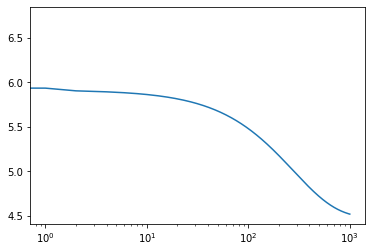

[-3.89578088  1.19303364]
[-3.24140214  1.1272942 ]


In [29]:
theta, cost = gradient_descent_iterations(population_profit_X, population_profit_Y, np.array([0, 0]), 0.01, 1000)
plt.plot(range(len(cost)), cost)
plt.xscale("log")
plt.show()
print(normal_equation(population_profit_X, population_profit_Y))
print(theta)

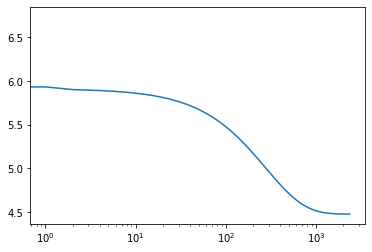

[-3.89578088  1.19303364]
[-3.84042927  1.18747297]


In [30]:
theta, cost = gradient_descent_convergence(population_profit_X, population_profit_Y, np.array([0, 0]), 0.01, precision=0.01)
plt.plot(range(len(cost)), cost)
plt.xscale("log")
plt.show()
print(normal_equation(population_profit_X, population_profit_Y))
print(theta)

Because gradient descent is numerical algorithm and not analytical we will not get perfect solution. Also for datasets with small amount of features it will be actually slower than the normal equation method, as we need to choose $ \alpha $, which needs to be expirimented with, because if we choose too big $ \alpha $ the gradient descent will actually never converge and will just diverge and if we choose too small $ \alpha $ gradient descent will be too slow because it will take only small steps towards the optimum.

Here is an example with alpha slowly diverging from the optimum

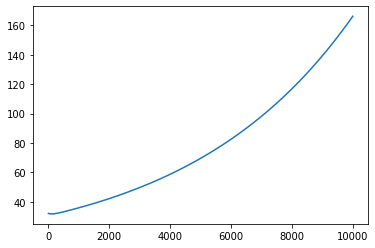

In [31]:
theta, cost = gradient_descent_iterations(population_profit_X, population_profit_Y, np.array([0, 0]), 0.024325, 10000)
plt.plot(range(len(cost)), cost)
plt.show()

And here is example that with enough number of iterations gradient descent will achieve the same numbers as normal equation. One thing to note is that **$ \theta $ could look very diferent for normal equation and gradient descent, but the change in the cost function that is actually important to be not so significant**

In [32]:
theta, _ = gradient_descent_iterations(population_profit_X, population_profit_Y, np.array([0, 0]), 0.01, 100000)
print(theta)
print(normal_equation(population_profit_X, population_profit_Y))

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]


### Feature scaling

Another thing to consider with gradient descent is feature scalling. Because $ \theta $ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.  
This is actually the case with our `house_price` data. A lot of feature scaling techniques exist. Most comonly used ones are
* **Normalization** rescaling data to values between 0 and 1. One possible way to achieve it is with this formula:
 $$ x^\prime = \frac{x-min(x)}{max(x)-min(x)} $$
* **Standardization** centering the data arround the zero with standard divietion of one $$ x^\prime = \frac{x-mean(x)}{\sigma} $$

Which technique for feature scalling to use is a though question and it depends a lot on your data. But in general every method should  make improvments and also some experiments could be made.

Let's implement this tecniques in python

In [33]:
def min_max_scale(x):
    x_prime = (x - x.min()) / (x.max() - x.min())
    return x_prime

In [34]:
def standardize(x):
    x_prime = (x - x.mean()) / x.std()
    return x_prime

Lets test our implementation comparing it to `sklearn` implementation for feature scaling. Some usefull scalling techniques are implemented in `preprocessing` module of `sklearn`.

In [35]:
x = population_profit["Population"].to_numpy()

In [36]:
actual = min_max_scale(x)
expected = preprocessing.minmax_scale(x)
assert all([math.isclose(a, e) for a, e in zip(actual, expected)])

In [37]:
actual = standardize(x)
expected = preprocessing.scale(x)
assert all([math.isclose(a, e) for a, e in zip(actual, expected)])

Now that we know our feature scalling methods work. We can try using them for our `house_price` dataset. 

To make feature scaling more usefull for our purposes lets create two methods `getXScaled` and `getYScaled`. That will accept `dataFrame` and a function to scale the values.

In [38]:
def getXScaled(dataFrame, scale):
    n, m = dataFrame.shape
    X = dataFrame.iloc[:, 0:m-1].values.astype('float64')
    for i in range(1, m-1):
        X[:, i] = scale(X[:,i])
    return X

In [39]:
def getYScaled(dataFrame, scale):
    n, m = dataFrame.shape
    return scale(dataFrame.iloc[:, m-1].values)

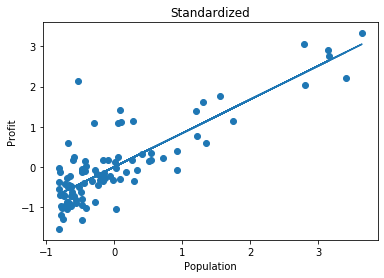

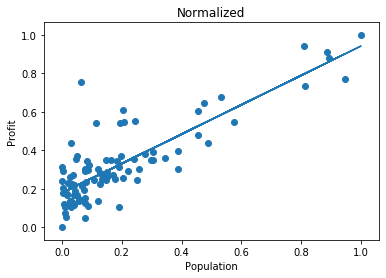

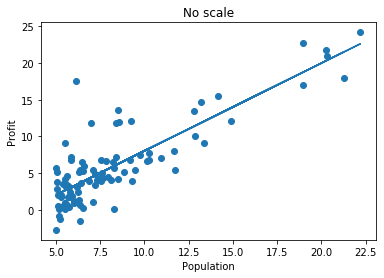

In [40]:
def visualize(title, scale = None):
    X = population_profit_X
    Y = population_profit_Y
    if scale != None:
        X = getXScaled(population_profit, scale)
        Y = getYScaled(population_profit, scale)
    theta = normal_equation(X, Y)
    plt.scatter(X[:,1], Y)
    plt.plot(X[:,1], hypothesis(X, theta))
    plt.xlabel("Population")
    plt.ylabel("Profit")
    plt.title(title)
    plt.show()

visualize("Standardized", standardize)
visualize("Normalized", min_max_scale)
visualize("No scale")

Here we see that the plots are identical and just with different scale so that gives us confidence that our functions work.  
So we can now test gradient descent algorithm with scalled data from `house_prices` data frame.

In [42]:
house_prices_X = getXScaled(house_prices, standardize)
house_prices_Y = getYScaled(house_prices, standardize)

In [43]:
theta, cost = gradient_descent_iterations(house_prices_X, house_prices_Y, np.array([0,0,0]), 1)
normal_eq_theta = normal_equation(house_prices_X, house_prices_Y)
print(compute_cost(house_prices_X, house_prices_Y, theta))
print(compute_cost(house_prices_X, house_prices_Y, normal_eq_theta))
print(theta)
print(normal_eq_theta)

0.13352749098554287
0.13352749098554287
[-1.21652097e-16  8.84765988e-01 -5.31788197e-02]
[ 4.16333634e-17  8.84765988e-01 -5.31788197e-02]


### Stochastic gradient descent

Gradient descent requires computing the derivative of the function on every step towards the minimum, but computing the derivative is very costly operation, because it requires looping through all the samples in our data. But what if we have **10 milion samples**. Is it really needed to loop through all the data? Well if you want to use what is called **batch gradient descent** yes. But there is **SGD(stochastic gradient descent)**, basically, in **SGD**, we are using the cost gradient of **1 example** at each iteration, instead of using the sum of the cost gradient of **all** examples.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

To implement SGD we only need to add function that will randomly select batch for the descent step and to change the `gradient_descent_step` function to use it.

In [44]:
def next_batch(X, Y, batchSize = 10):
    batch = np.random.randint(0, X.shape[0], size=batchSize)
    x = []
    y = []
    for i in batch:
        x.append(X[i])
        y.append(Y[i])
        
    return (np.array(x), np.array(y))
        

def gradient_descent_step(X, Y, theta, alpha, precision):
    converge = True
    temp = np.zeros(theta.size)
    x, y = next_batch(X, Y)
    error = np.dot(x, theta) - y
    for j in range(theta.size):
        derivative = derivative_calc(x, theta, error, j)
        converge = converge and np.absolute(derivative) <= precision 
        temp[j] = theta[j] - alpha * derivative
        
    cost = compute_cost(X, Y, temp)
    return temp, cost, converge

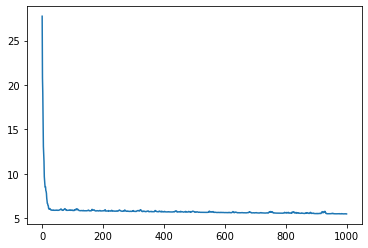

[-0.57952676  0.86397331]
[-3.89578088  1.19303364]


In [45]:
theta, cost = gradient_descent_iterations(population_profit_X, population_profit_Y, np.array([0,0]), 0.001)
plt.plot(range(len(cost)), cost)
plt.show()
print(theta)
print(normal_equation(population_profit_X, population_profit_Y))

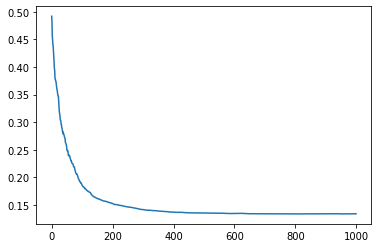

[-0.0234088   0.8726388  -0.04993905]
[ 4.16333634e-17  8.84765988e-01 -5.31788197e-02]


In [47]:
theta, cost = gradient_descent_iterations(house_prices_X, house_prices_Y, np.array([0, 0, 0]), 0.01)
plt.plot(range(len(cost)), cost)
plt.show()
print(theta)
print(normal_equation(house_prices_X, house_prices_Y))

`Sklearn` also provides implementation for SGD, more information on how it could be used can be gained from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).  
Here is an example with our data for `house_prices` and learning rate $ \alpha= 0.01 $

In [47]:
print(SGDRegressor(fit_intercept=False, learning_rate="constant", eta0=0.01).fit(house_prices_X, house_prices_Y).coef_)

[-0.00620966  0.86525881 -0.02435486]


#### Gradient descent disadvantages

`Gradient descent` has many disadvantages compared to `Normal equation` method, there is the need for feature scaling, there are many iterations, proper learning rate coeficient should be choosed.

The following table describes the difference between the `Gradient descent` and `Normal equation` methods. And could be used to tell when to use one and when the other. In general for small amount of features `Normal equation` method is preffered but if you have like 10000 features or  more `Normal equation` just can not scale.

| Gradient Descent           | Normal Equation                                         |
| :------------------------- | :------------------------------------------------------ |
| Need to choose alpha       | No need to choose alpha                                 |
| Needs many iterations      | No need to iterate                                      |
| Needs feature scaling      | No need for feature scaling                             |
| $ O (kn^2) $               | $ O (n^3) $                                             |
| Works well when n is large | Does not scale                                          |

## Metrics used to score linear regression

### Mean Squared Error(MSE)

MSE is basically what our cost function is 
$$ MSE = \frac{1}{n}\sum(y-\hat{y})^2 $$
Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.

Some variations of **MSE** exists:
* **Root Mean Squared Error** that is just equal to $ \sqrt{MSE} $. 
* **Mean Absolute Error (MAE)** that just sums the absolute error insetat of the squared error. $ MAE = \frac{1}{n}\sum|y-\hat{y}| $

### R² or Coefficient of Determination.

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination.  
R-squared is the percentage of the dependent variable variation that a linear model explains.
$$ R^2 = 1 - \frac{S_e^2}{S_y^2} $$
Where $ S_e^2 $ is the Residuals Square Error $ \sum(y-\hat{y})^2 $ and $ S_y^2 $ is $ \sum(y-y.mean())^2 $. 


In [48]:
def residuals_square_error(X, Y, theta):
    inner = np.power((np.dot(X, theta) - Y), 2)
    return np.sum(inner)

def variance(y):
    return np.sum(np.power(y-y.mean(),2))

def R_squared(X, Y, theta):
    return 1 - residuals_square_error(X, Y, theta)/variance(Y)

In [49]:
theta = normal_equation(population_profit_X, population_profit_Y)
R_squared(population_profit_X, population_profit_Y, theta)

0.7020315537841397

There is $ R^2 $ score implementation in `sklearn`. That accepts the actual and the predicted $ y $.

In [50]:
r2_score(population_profit_Y, hypothesis(population_profit_X, theta))

0.7020315537841397

### Adjusted R²

The problem with $ R^2 $ is that it will always increase when you add features, even if this features actually don't help. It is not possible for it to calculate that. That is why we introduce **adjusted $ R^2 $**, it measures the proportion of variation explained by only those features that really help in explaining the output. It penalizes you for adding features that do not help.

Adjusted $ R^2 $ can be calculated from the $ R^2 $ using the following formula: 
$$ \bar{R^2} = 1 - (1 - R^2)\frac{n-1}{n-p-1} $$ 
Where the number of features is $ p $ and number of samples $ n $.

In [51]:
def adjusted_R_squared(X, Y, theta):
    return 1 - (1-R_squared(X, Y, theta))*((X.shape[0]-1)/(X.shape[0] - X.shape[1]))

In [52]:
adjusted_R_squared(population_profit_X, population_profit_Y, theta)

0.6988950438239727

## Things that are left

* [dummy variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) a way to encode categorical  features for linear regression. Categorical features means feature with fixed amount of values for example gender: Male, Female

* [interaction-terms](https://statisticsbyjim.com/regression/interaction-effects/) used in situations where the dependence is not exactly linear

## Reletated articles

* **Supervised vs Unsupervised learning** https://medium.com/@gowthamy/machine-learning-supervised-learning-vs-unsupervised-learning-f1658e12a780
* **Andrew Ng course week 1 and week 2**: https://www.coursera.org/learn/machine-learning/ 
* **Linear regression in python**: [link1](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/) [link2](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/) [link3](https://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb) [lin4](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
* **Normal equation** https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-least-squares-approximation
* **Gradient descent** https://mccormickml.com/2014/03/04/gradient-descent-derivation/
* **Stochastic gradeint descent** https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
* **$R^2$ score** https://www.statlect.com/fundamentals-of-statistics/R-squared-of-a-linear-regression

## Citations

Travis E. Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), [DOI:10.1109/MCSE.2011.37](https://ieeexplore.ieee.org/document/5725236) [(publisher link)](http://scitation.aip.org/content/aip/journal/cise/13/2/10.1109/MCSE.2011.37)

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), [DOI:10.1109/MCSE.2007.55](https://ieeexplore.ieee.org/document/4160265) [(publisher link)](https://ieeexplore.ieee.org/document/4160251)

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) [(publisher link)](http://conference.scipy.org/proceedings/scipy2010/mckinney.html)

Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011) [(publisher link)](http://jmlr.org/papers/v12/pedregosa11a.html)